In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
tables = Base.classes

In [6]:
# View all of the classes that automap found
tables.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Locate the column of date in the table
station_columns = inspect(engine).get_columns("station")
for a in station_columns:
    print(a["name"])

id
station
name
latitude
longitude
elevation


In [10]:
# Find the most recent date in the data set.
# Locate the column of date in the table
measurement_columns = inspect(engine).get_columns("measurement")
for b in measurement_columns:
    print(b["name"])

id
station
date
prcp
tobs


In [11]:
# The column of date is located in the table of measurement
# Find the most recent date in the table of measurement
MD = Measurement.date
most_recent_date = session.query(MD).order_by(MD.desc()).first()
most_recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
init_date = dt.date(2017,8,23) - dt.timedelta(days=365)
init_date

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
MP = Measurement.prcp
past_12M_prcp = session.query(MD, MP).filter(MD >= init_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
past_12M_prcp_df = pd.DataFrame(past_12M_prcp, columns=['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
past_12M_prcp_df = past_12M_prcp_df.sort_values("Date")
past_12M_prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


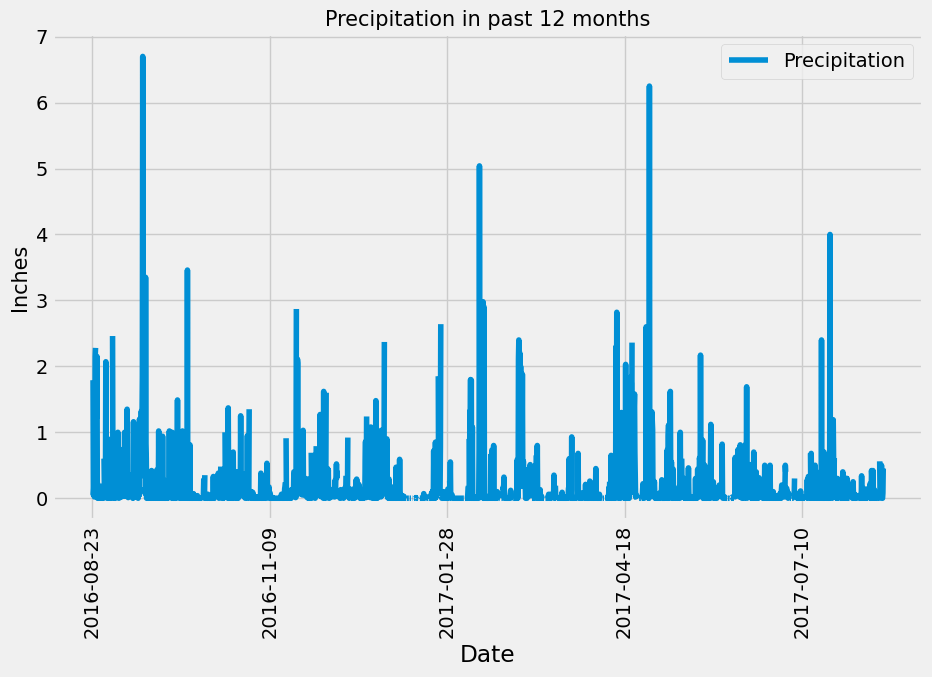

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
past_12M_prcp_df.plot(rot=90,figsize=(10,6),grid=True)
plt.title('Precipitation in past 12 months', size=15)
plt.ylabel('Inches', size=15)
plt.savefig("Output/prcp.png")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
past_12M_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(Station.station).count()
total_stations

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
MS = Measurement.station
act_stations = session.query(MS,func.count(MS)).order_by(func.count(MS).desc()).group_by(MS).all() 
act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Identify the most active station id based on the most rows from previous query
print('The most active station is USC00519281 (2772 rows)' )

The most active station is USC00519281 (2772 rows)


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
MT = Measurement.tobs
lowest_temp = session.query(func.min(MT)).filter(MS=='USC00519281').all()
highest_temp = session.query(func.max(MT)).filter(MS=='USC00519281').all()
avg_temp = session.query(func.avg(MT)).filter(MS=='USC00519281').all()
print(lowest_temp, highest_temp, avg_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
past_12M_tobs = session.query(MT).filter(MS=='USC00519281').filter(MD >=init_date).all()
print(past_12M_tobs)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [21]:
# Create a data frame
past_12M_tobs_df = pd.DataFrame(past_12M_tobs, columns=['tobs'])
past_12M_tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


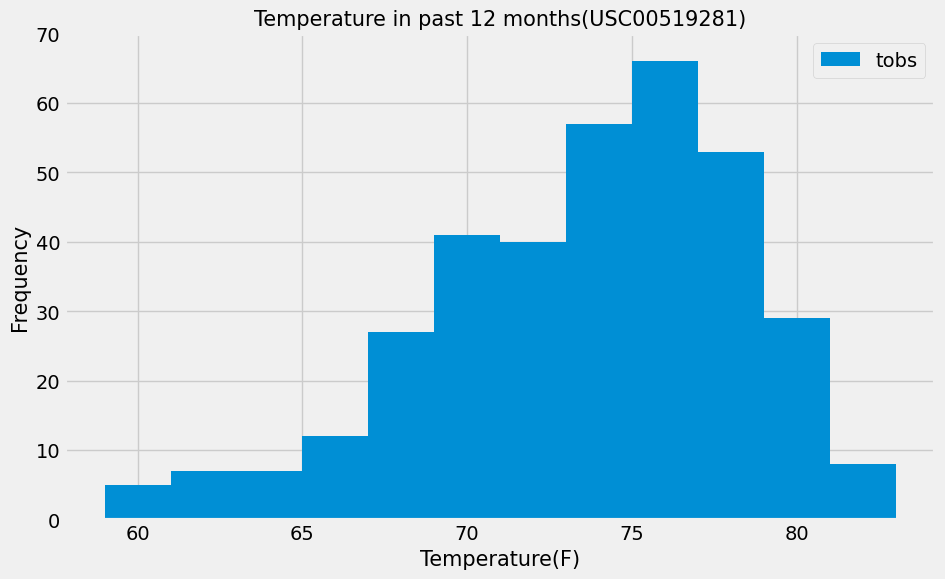

In [22]:
# Plot the results as a histogram
past_12M_tobs_df.plot.hist(bins=12, grid=True, figsize=(10,6))
plt.title('Temperature in past 12 months(USC00519281)', size=15)
plt.xlabel('Temperature(F)', size=15)
plt.ylabel('Frequency', size=15)
plt.ylim(0, 70)
plt.savefig("Output/tobs.png")
plt.show()

# Close Session

In [23]:
# Close Session
session.close()